In [51]:
import pandas as pd
import matplotlib.pyplot as plt


def normalize_data(path: str, header: int = 10, index_col: int = 0, nrows: int = 23) -> pd.DataFrame:
  df = pd.read_csv(path, header=header, index_col=index_col, nrows=nrows).apply(pd.to_numeric, errors="coerce").dropna()
  df.columns = df.columns.astype(int)
  df.index = [str(i).strip() for i in df.index]
  return df
  
def plotter(df: pd.DataFrame, title: str, ylabel: str) -> None:
  ax = df.plot(figsize=(10, 8))
  # 凡例をプロットの外に配置 (右上に配置)
  ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

  # タイトルと軸ラベルを追加（必要に応じて）
  plt.title(title)
  plt.xlabel('year')
  plt.ylabel(ylabel)

  # レイアウトを調整して、凡例がグラフを隠さないようにする
  plt.tight_layout()

  # 表示
  plt.show()
  

# Manufacturing output


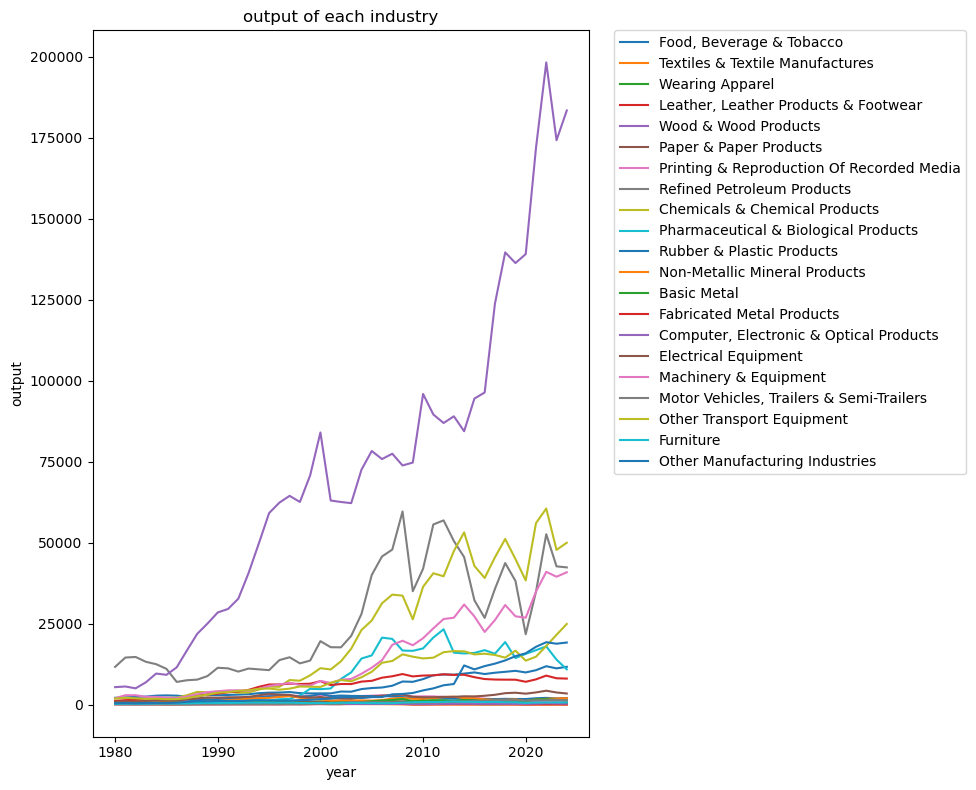

In [52]:
import matplotlib.pyplot as plt

manufacturing_output = normalize_data("./data/singapore/sg_manufac_output_by_industry.csv").T
plotter(manufacturing_output.drop("Total Manufacturing", axis=1).sort_index(), "output of each industry", "output")

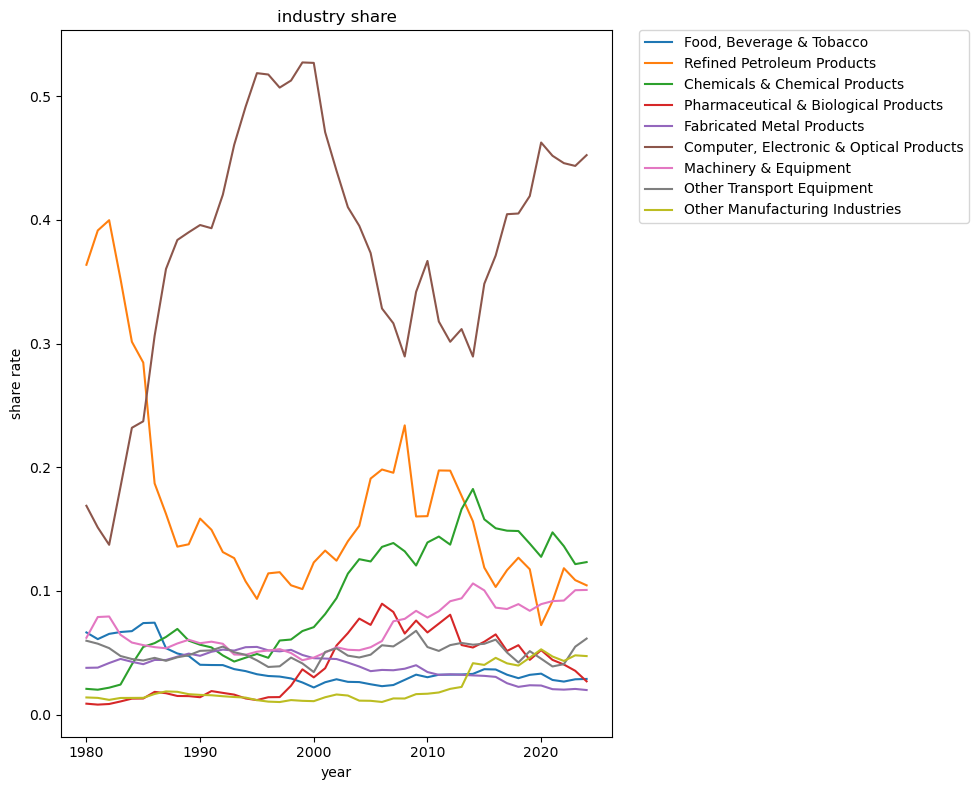

In [53]:
industry_share = {}
for col in manufacturing_output.columns:
  if col == "Total Manufacturing":
    continue
  share_series = manufacturing_output[col] / manufacturing_output["Total Manufacturing"]
  if share_series.apply(lambda x: x >= 0.05).any():
    industry_share[col] = share_series

plotter(pd.DataFrame(industry_share, index=manufacturing_output.index).sort_index(), "industry share", "share rate")


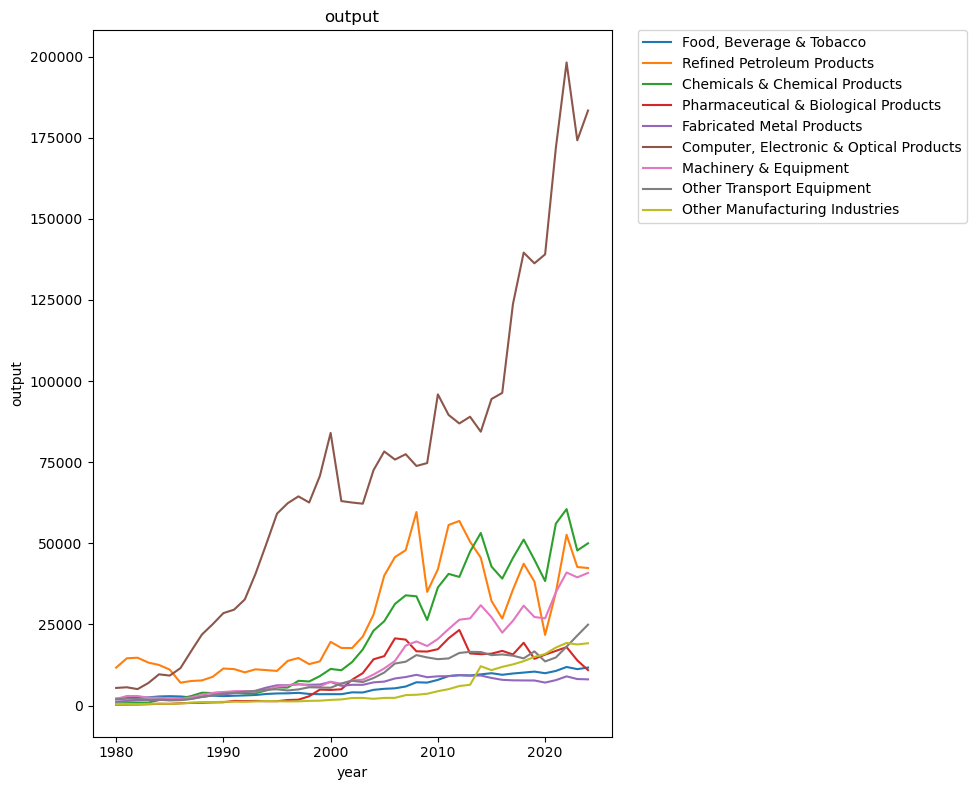

In [70]:
major_industries = list(industry_share.keys())
plotter(manufacturing_output[major_industries], "output", "output")

# Manufacturing workers

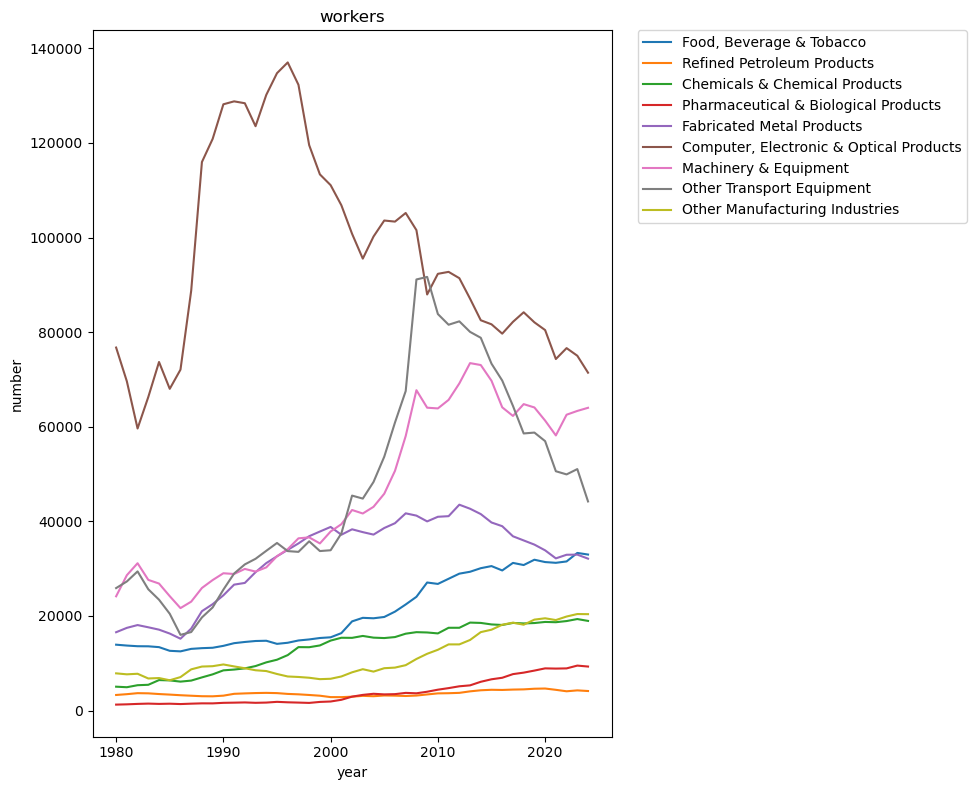

In [ ]:
manufacturing_workers = normalize_data("./data/singapore/sg_manufac_workers_by_industry.csv").T
plotter(manufacturing_workers[major_industries].sort_index(), "workers", "number")



# Output per worker by industry

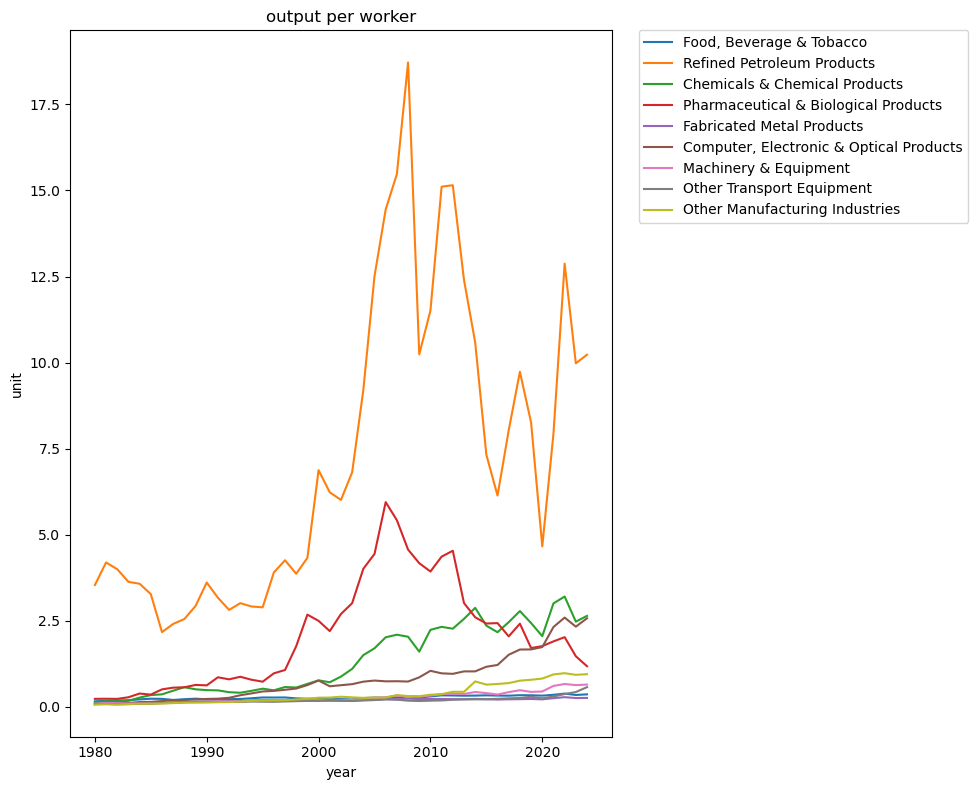

In [ ]:
output_per_worker = manufacturing_output[major_industries] / manufacturing_workers[major_industries]
plotter(output_per_worker.sort_index(), "output per worker", "unit")
# output_per_worker
# plotter(output_per_worker)

[]

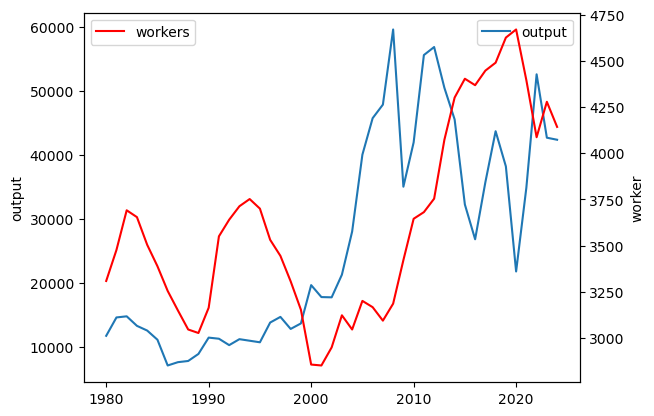

In [80]:

fig, ax1 = plt.subplots()
ax1.plot(manufacturing_output["Refined Petroleum Products"], label="output")
ax1.set_ylabel("output")
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(manufacturing_workers["Refined Petroleum Products"], color="red", label="workers")
ax2.set_ylabel("worker")
ax2.legend()
plt.plot()

In [74]:
for output, worker in zip(manufacturing_output["Computer, Electronic & Optical Products"] * 100, manufacturing_workers["Computer, Electronic & Optical Products"]):
  print(output, worker, output/worker)

18334810.0 71426.0 256.6965810769188
17417120.0 75012.0 232.19111608809257
19816960.0 76619.0 258.64289536537933
17183380.0 74316.0 231.2204639646913
13904110.0 80435.0 172.86144091502456
13627229.999999998 82070.0 166.043986840502
13957090.0 84196.0 165.76903890921184
12372950.0 82173.0 150.57196402711352
9633650.0 79679.0 120.90575935942971
9445660.0 81653.0 115.68050163496748
8438190.0 82509.0 102.26993418899757
8899170.0 87068.0 102.20942252032894
8692310.0 91404.0 95.09769813137281
8954620.0 92737.0 96.55930211242546
9589090.0 92322.0 103.86570914841533
7471680.0 87960.0 84.94406548431105
7381900.0 101558.0 72.68654364993402
7744910.000000001 105183.0 73.63271631347271
7579160.000000001 103359.0 73.32849582523052
7828960.000000001 103590.0 75.57640698909162
7252739.999999999 100207.0 72.37757841268574
6219930.0 95534.0 65.106977620533
6255350.0 100780.0 62.06935899980155
6300580.0 106824.0 58.98094061259642
8401160.0 111067.0 75.64046926629872
7076789.999999999 113340.0 62.4385918

# Manufacturing value addition


In [57]:
import pandas as pd

df = pd.read_csv("./data/singapore/sg_manufac_added_values_by_industry.csv", header=9, index_col=0, nrows=23)

df.columns = df.iloc[0, :]
df = df.drop(["Data Series"])

df

Data Series,2024.0,2023.0,2022.0,2021.0,2020.0,2019.0,2018.0,2017.0,2016.0,2015.0,...,1989.0,1988.0,1987.0,1986.0,1985.0,1984.0,1983.0,1982.0,1981.0,1980.0
Total Manufacturing,114463.7,108755.5,136145.0,115341.1,88901.0,92570.4,99540.8,79060.9,70043.7,69001.5,...,15139.7,13606.2,11192.3,9366.8,8251.5,8703.1,7824.2,6468.3,7111.3,7239.3
"Food, Beverage & Tobacco",4929.9,4067.1,4613.3,4182.4,3962.0,4415.4,3933.0,3987.3,3780.2,3763.0,...,674.0,627.2,550.3,508.1,476.0,448.0,457.8,337.8,339.0,315.3
Textiles & Textile Manufactures,20.0,19.8,14.0,12.3,11.6,23.1,27.2,26.6,23.3,21.1,...,85.7,81.2,71.2,54.7,44.5,55.9,62.2,55.5,75.1,109.8
Wearing Apparel,119.8,80.8,105.8,75.2,79.8,96.7,87.2,96.7,80.7,91.8,...,468.0,452.7,387.0,307.2,292.5,312.6,283.7,235.3,228.8,239.6
"Leather, Leather Products & Footwear",17.5,40.4,42.1,42.6,30.7,52.7,51.9,44.9,58.7,62.5,...,32.0,27.7,23.6,20.5,23.3,38.8,41.0,31.9,33.3,36.0
Wood & Wood Products,130.1,161.4,179.3,133.5,109.9,111.1,121.2,142.0,128.5,124.3,...,89.7,82.2,67.7,65.7,71.1,84.9,106.9,68.9,102.0,148.0
Paper & Paper Products,247.7,250.7,251.7,256.8,263.0,245.8,227.5,240.6,232.1,238.6,...,238.5,233.5,208.2,164.1,152.8,133.3,114.6,52.6,46.4,73.6
Printing & Reproduction Of Recorded Media,466.0,489.8,531.3,588.1,617.7,841.3,834.6,902.9,1000.1,1133.2,...,593.9,530.3,469.5,405.7,412.0,426.8,361.1,254.8,242.2,233.6
Refined Petroleum Products,7621.2,9517.2,7350.8,5106.8,1586.2,787.5,1119.3,1874.1,2034.3,2412.0,...,1137.4,720.3,533.7,576.5,608.7,644.1,1049.6,1172.9,1311.7,1256.3
Chemicals & Chemical Products,10985.5,10561.9,14112.7,14905.9,10792.5,10899.1,11585.3,12191.2,12391.5,7992.9,...,1177.5,1324.4,883.3,541.7,341.1,353.8,291.6,174.6,156.5,196.2


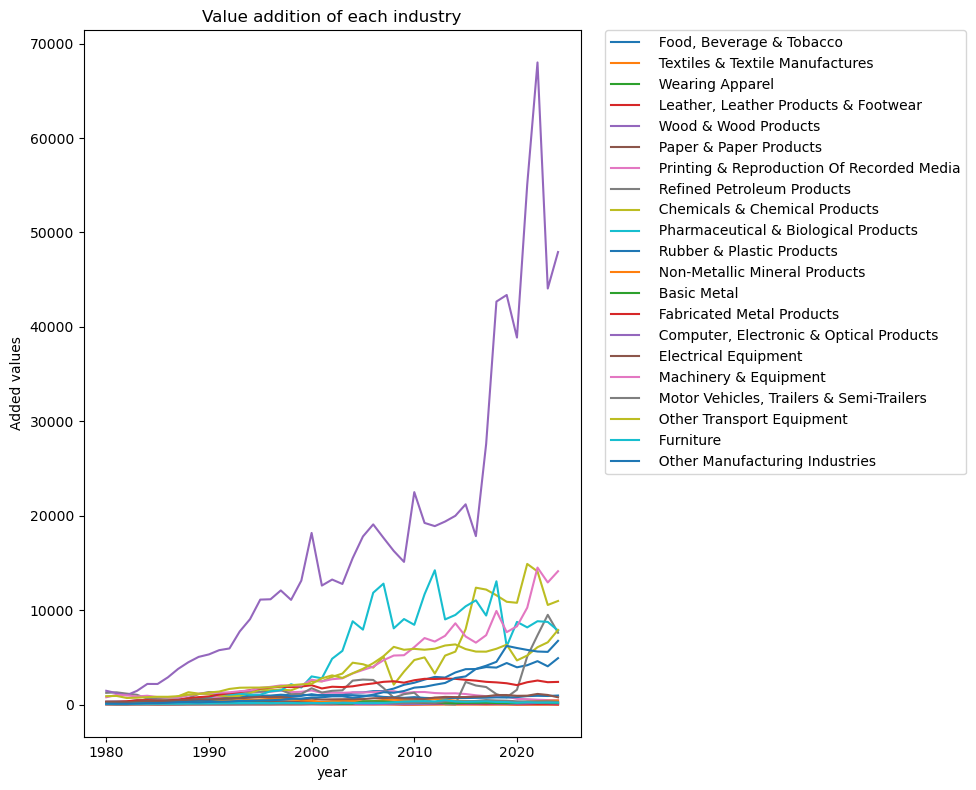

In [58]:
import matplotlib.pyplot as plt

ax = df.drop("Total Manufacturing").T.plot(figsize=(10, 8))

# 凡例をプロットの外に配置 (右上に配置)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# タイトルと軸ラベルを追加（必要に応じて）
plt.title('Value addition of each industry')
plt.xlabel('year')
plt.ylabel('Added values')

# レイアウトを調整して、凡例がグラフを隠さないようにする
plt.tight_layout()

# 表示
plt.show()



# Manufacturing establishments

In [59]:
import pandas as pd

df = pd.read_csv("./data/singapore/sg_manufac_establishments_by_industry.csv", header=9, index_col=0, nrows=23)

df.columns = df.iloc[0, :]
df = df.drop(["Data Series"])

df

# definition footnotes
# From 2002, figures include establishments with less than 10 workers.  Prior to 2002, figures refer to establishments engaging 10 or more workers.  Data include all manufacturing establishments.  The industries are classified according to Singapore Standard Industrial Classification (SSIC) 2020.

Data Series,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
Total Manufacturing,10604,9872,9540,9175,9017,8788,9096,8988,8778,9106,...,3660,3624,3514,3449,3504,3648,3616,3586,3439,3355
"Food, Beverage & Tobacco",1676,1381,1253,1049,1046,944,942,948,847,865,...,278,288,299,303,299,316,308,302,295,300
Textiles & Textile Manufactures,134,120,122,120,117,113,109,100,89,90,...,58,58,52,52,51,64,70,74,70,71
Wearing Apparel,380,340,346,359,372,376,400,394,362,384,...,381,379,384,383,383,402,407,424,394,399
"Leather, Leather Products & Footwear",26,24,21,21,24,18,22,15,18,20,...,54,60,75,76,78,96,88,96,98,98
Wood & Wood Products,212,199,189,173,166,154,168,143,131,140,...,91,89,95,100,108,103,111,118,131,130
Paper & Paper Products,80,79,79,76,83,85,94,88,91,99,...,89,88,81,80,84,89,91,95,97,95
Printing & Reproduction Of Recorded Media,849,813,802,798,798,806,852,874,882,911,...,328,311,320,317,304,326,319,317,297,289
Refined Petroleum Products,18,18,18,17,18,18,18,17,17,16,...,8,8,9,9,10,10,9,9,10,9
Chemicals & Chemical Products,395,338,334,312,300,279,279,282,264,273,...,142,136,133,132,131,131,121,116,113,116


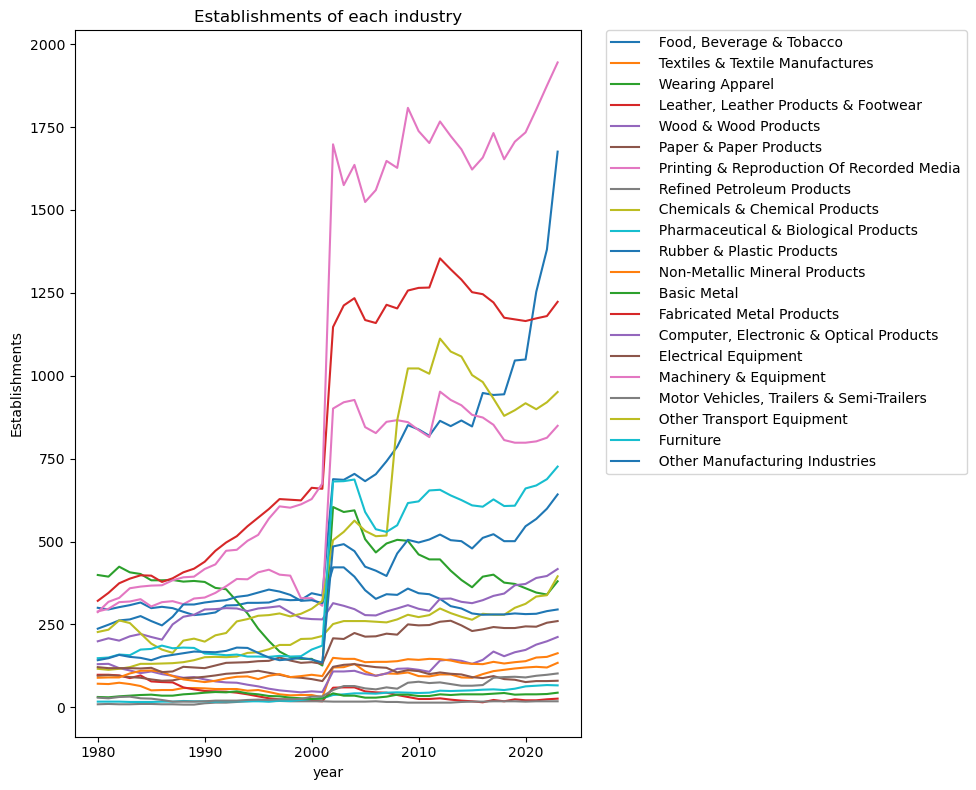

In [60]:
import matplotlib.pyplot as plt

ax = df.drop("Total Manufacturing").T.plot(figsize=(10, 8))

# 凡例をプロットの外に配置 (右上に配置)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# タイトルと軸ラベルを追加（必要に応じて）
plt.title('Establishments of each industry')
plt.xlabel('year')
plt.ylabel('Establishments')

# レイアウトを調整して、凡例がグラフを隠さないようにする
plt.tight_layout()

# 表示
plt.show()



# FDI by sectors

In [61]:
import pandas as pd

df = pd.read_csv("./data/singapore/sg_fdi_by_sectors.csv")

df = df.sort_index(axis=1).set_index("DataSeries")
print(df.iloc[1, :].index)
total_manufacturing = list(df.iloc[1, :].astype(float))


Index(['1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')


In [62]:
cleanup_df = df.copy()
for col in cleanup_df.columns:
  cleanup_df[col] = pd.to_numeric(cleanup_df[col], errors="coerce")
df = cleanup_df
df = df.iloc[2 : 13]
df

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
DataSeries,,,,,,,,,,,,,,,,,,,,,
"Food, Beverages & Tobacco",30.9,98.5,129.5,100.6,72.0,52.9,109.3,146.1,194.4,134.8,...,1525.4,1388.5,1524.0,3486.4,2720.9,5796.2,3335.0,3149.7,4687.3,2097.6
"Paper, Paper Products & Printing",41.2,101.8,69.4,36.2,39.6,28.4,26.9,46.2,113.6,26.7,...,38.5,59.6,121.6,14.9,5.0,39.6,109.1,1.3,-24.9,109.9
Refined Petroleum Products,NaN,NaN,-22.5,-288.1,670.0,1984.7,2738.8,3781.2,4149.0,5935.1,...,1567.9,3817.0,7606.5,6758.0,3509.2,4449.8,2187.6,11480.7,5445.6,7495.6
Chemical & Chemical Products,-106.0,-1395.3,305.8,9.3,1569.4,754.3,2135.7,1522.1,1453.6,1160.4,...,1462.3,2152.1,3073.2,2985.5,3747.8,4544.6,4791.3,6496.8,5146.6,4080.7
Pharmaceutical & Biological Products,NaN,NaN,2314.8,4358.5,3037.0,5759.3,5574.1,10448.2,4849.9,18439.1,...,8639.2,8727.1,9038.5,7257.0,11606.1,5458.6,6435.0,6092.9,5807.3,7038.1
Rubber & Plastic Products,61.6,81.6,87.8,74.9,63.4,107.8,89.0,119.8,122.5,99.2,...,122.6,97.7,238.0,345.1,239.8,168.3,168.6,171.0,338.5,260.5
Basic Metals,15.9,NaN,16.9,15.5,NaN,13.4,12.5,5.2,9.1,16.9,...,8.6,NaN,2.1,1.8,-1.3,-9.2,1.9,6.5,3.8,0.9
Fabricated Metal Products,131.3,168.6,158.2,62.5,93.6,49.1,135.3,75.9,-156.3,80.5,...,219.4,73.2,146.5,260.9,235.0,299.0,271.0,369.9,413.9,187.1
Machinery & Equipment,267.2,351.6,498.5,424.3,314.3,378.3,132.3,861.8,804.6,846.1,...,2313.8,2268.2,2391.6,3168.4,7639.7,6527.6,7074.5,11066.9,11980.6,13180.6


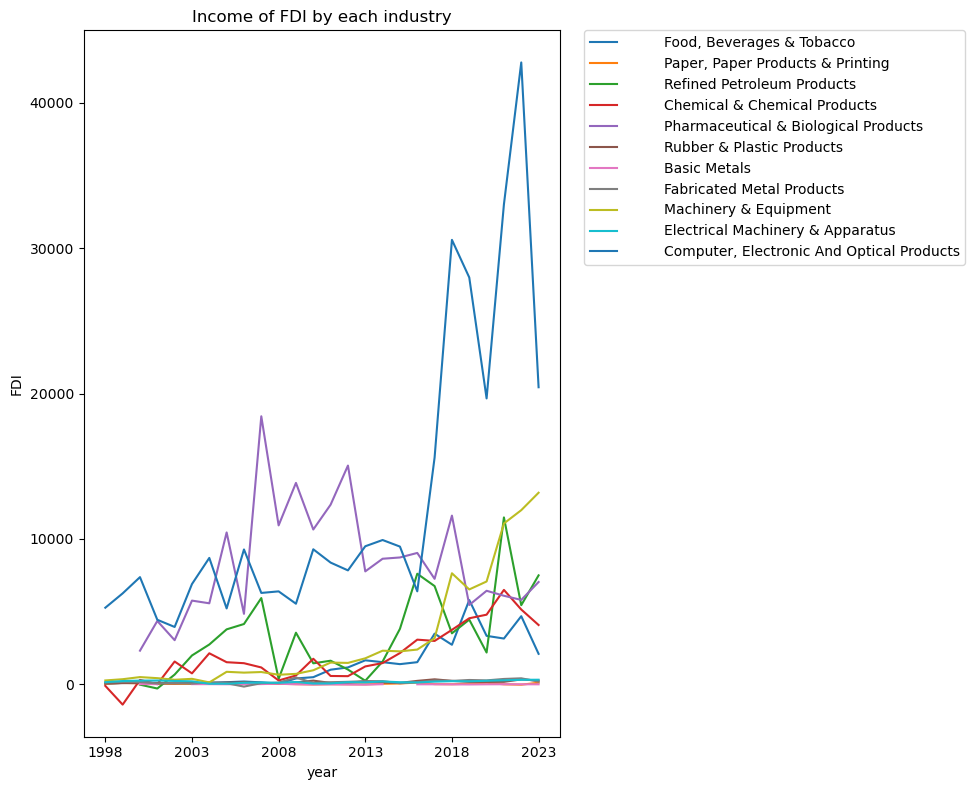

In [63]:

import matplotlib.pyplot as plt

ax = df.T.plot(figsize=(10, 8))

# 凡例をプロットの外に配置 (右上に配置)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# タイトルと軸ラベルを追加（必要に応じて）
plt.title('Income of FDI by each industry')
plt.xlabel('year')
plt.ylabel('FDI')

# レイアウトを調整して、凡例がグラフを隠さないようにする
plt.tight_layout()

# 表示
plt.show()



['        Food, Beverages & Tobacco', '        Paper, Paper Products & Printing', '        Refined Petroleum Products', '        Chemical & Chemical Products', '        Pharmaceutical & Biological Products', '        Rubber & Plastic Products', '        Basic Metals', '        Fabricated Metal Products', '        Machinery & Equipment', '        Electrical Machinery & Apparatus', '        Computer, Electronic And Optical Products']
        Food, Beverages & Tobacco
        Paper, Paper Products & Printing
        Refined Petroleum Products
        Chemical & Chemical Products
        Pharmaceutical & Biological Products
        Rubber & Plastic Products
        Basic Metals
        Fabricated Metal Products
        Machinery & Equipment
        Electrical Machinery & Apparatus
        Computer, Electronic And Optical Products


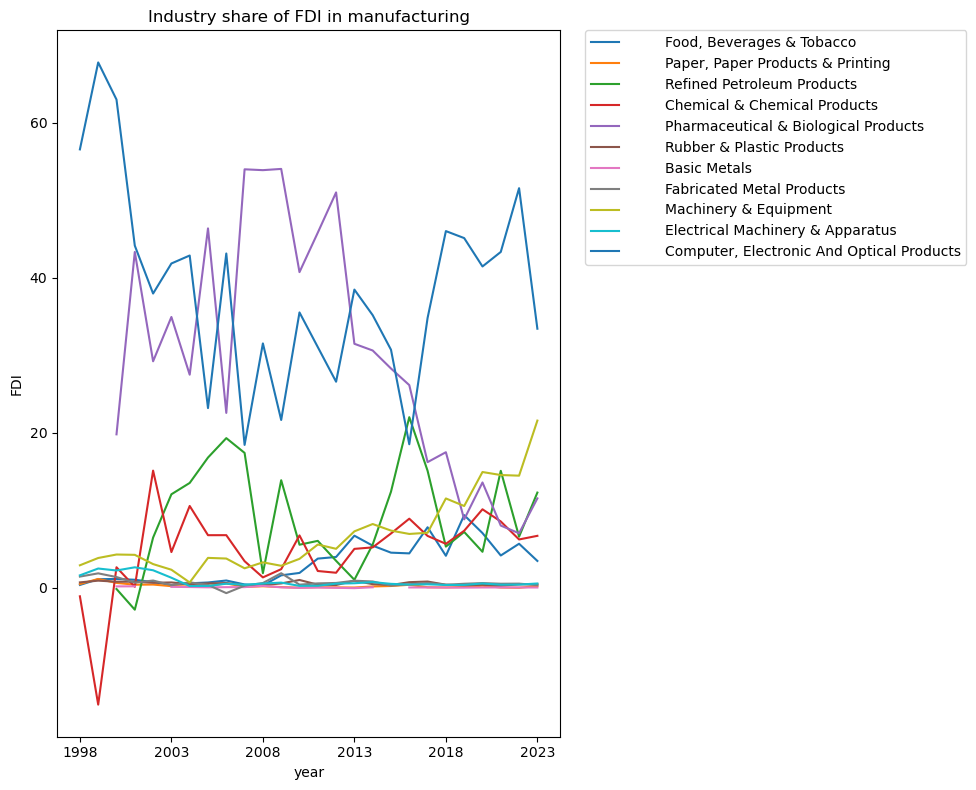

In [64]:
TOTAL_INDEX = 11
TOTAL_COLUMN = 26

row_names = list(df.index)
print(row_names)
convertToPercentage = []
for i in range(TOTAL_INDEX):
  line = df.iloc[i, :]
  print(line.name)
  each_industry = list(line)
  converted_number = [(numerator / denominator)*100 if not pd.isna(numerator) else None for numerator, denominator in zip(each_industry, total_manufacturing)]
  convertToPercentage.append([row_names[i], *converted_number])

percentage_index = []
percentage_data = []
for i in convertToPercentage:
  percentage_index.append(i[0])
  percentage_data.append(i[1:])

percentage = pd.DataFrame(percentage_data, index=percentage_index, columns=df.columns)

ax = percentage.T.plot(figsize=(10, 8))

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title('Industry share of FDI in manufacturing')
plt.xlabel('year')
plt.ylabel('FDI')

plt.tight_layout()

plt.show()


# Investment Commitment


In [65]:
import pandas as pd

df = pd.read_csv("./data/singapore/sg_fai_by_cluster.csv", header=9, index_col=0, nrows=10)
df.columns = df.iloc[0, :]
df = df.drop(index=[df.iloc[0].name, df.iloc[1].name, df.iloc[9].name])
df

Data Series,2024.0,2023.0,2022.0,2021.0,2020.0,2019.0,2018.0,2017.0,2016.0,2015.0,...,2013.0,2012.0,2011.0,2010.0,2009.0,2008.0,2007.0,2006.0,2005.0,2004.0
Manufacturing,11083.2,8701.4,17371.6,8485.7,13060.1,10884.2,5304.4,6200.6,5876.3,8299.7,...,7956.8,14299.4,11274.3,10033.6,10092.1,16386.3,16083.6,8842.5,8518.8,8258.1
Electronics,7665.0,3060.4,14994.4,4985.9,6475.1,4590.3,3088.3,2114.9,2231.7,3264.8,...,3264.1,6239.4,7384.4,5647.8,4672.4,2942.4,5164.0,4324.4,4464.5,4571.1
Chemicals,366.4,4502.8,862.2,979.9,4114.0,4891.3,214.2,1316.9,1259.1,3622.7,...,2508.5,5913.3,2523.8,1651.4,3055.6,11549.9,8613.2,2561.5,1944.8,1643.0
Biomedical Manufacturing,2215.5,898.5,843.6,1769.0,638.2,234.4,948.9,645.7,591.9,551.6,...,760.2,315.9,196.6,426.3,896.9,738.3,951.1,456.5,769.8,849.2
Precision Engineering,555.3,146.5,68.3,68.9,429.1,470.4,157.4,640.3,426.9,44.0,...,587.6,363.8,696.6,640.0,927.4,297.3,406.7,424.1,340.8,370.7
Transport Engineering,149.4,44.3,166.4,367.2,1280.3,302.8,700.9,396.3,1143.9,489.1,...,696.5,579.1,423.6,1480.5,279.2,655.7,509.4,476.5,597.5,484.5
General Manufacturing Industries,131.5,48.9,436.7,314.8,123.4,395.0,194.7,1086.5,222.8,327.5,...,139.9,887.9,49.3,187.6,260.6,202.7,439.2,599.5,401.4,339.6


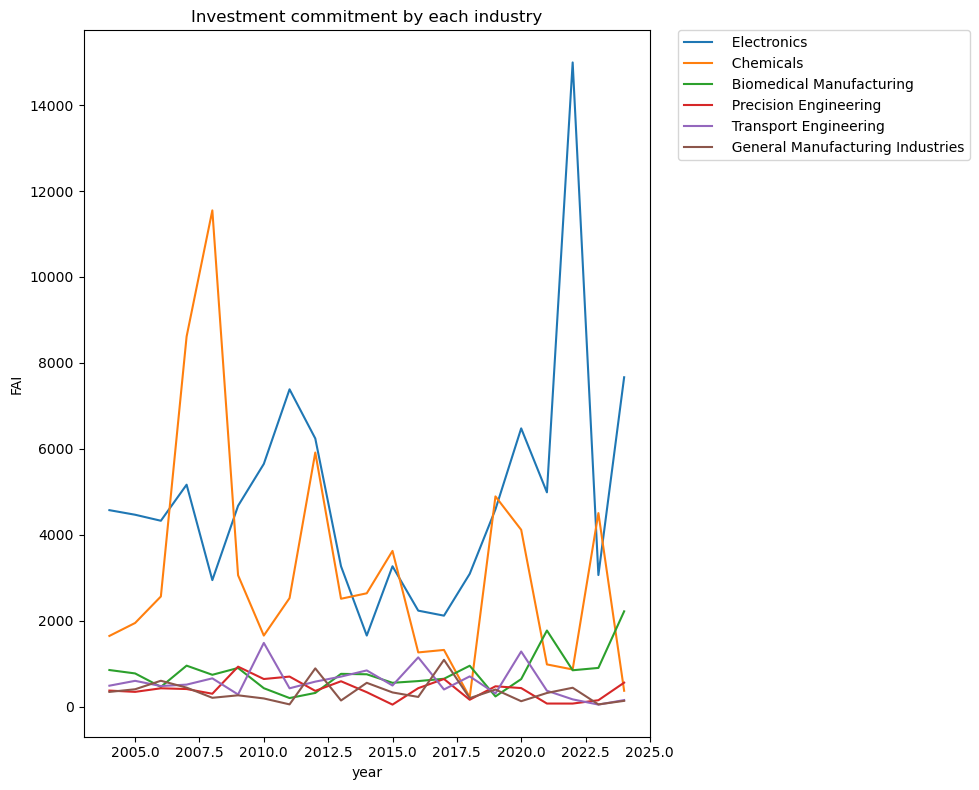

In [66]:
import matplotlib.pyplot as plt

ax = df.drop(df.iloc[0].name).T.plot(figsize=(10, 8))

# 凡例をプロットの外に配置 (右上に配置)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# タイトルと軸ラベルを追加（必要に応じて）
plt.title('Investment commitment by each industry')
plt.xlabel('year')
plt.ylabel('FAI')

# レイアウトを調整して、凡例がグラフを隠さないようにする
plt.tight_layout()

# 表示
plt.show()



<Axes: title={'center': 'investment origin share'}, xlabel='year', ylabel='Million SG$'>

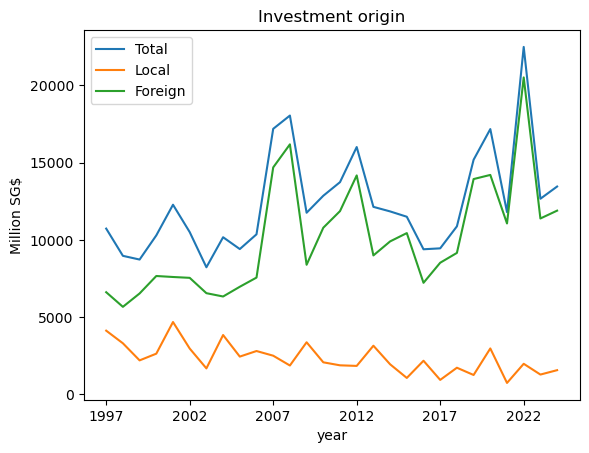

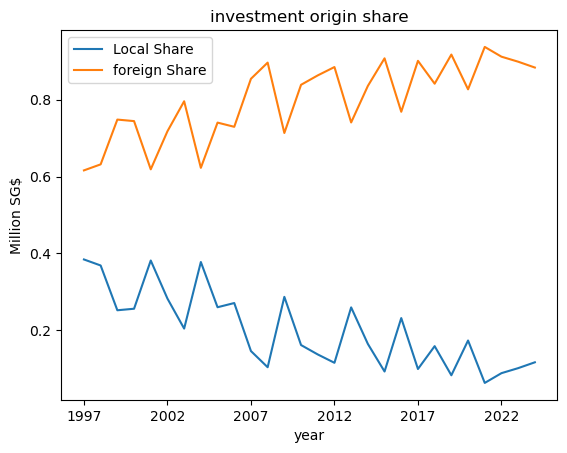

In [ ]:
# https://data.gov.sg/datasets/d_2ad3e9036c289bcc2a74dfec6b2512db/view
import requests
import pandas as pd

dataset_id = "d_2ad3e9036c289bcc2a74dfec6b2512db"
url = "https://data.gov.sg/api/action/datastore_search?resource_id="  + dataset_id 
res = requests.get(url).json()["result"]["records"]
investment_origin = {}
for col in res:
  column = col.copy()
  index = column["DataSeries"].strip()
  del column["DataSeries"]
  del column["_id"]
  investment_origin[index] = pd.Series(column).apply(pd.to_numeric, errors="coerce")
  
investment_origin_category = pd.DataFrame(investment_origin)[["Total", "Local", "Foreign"]]
investment_origin_category.plot(title="Investment origin", xlabel="year", ylabel="Million SG$")
investment_origin_category_share = pd.DataFrame({
  "Local Share":investment_origin_category["Local"] / investment_origin_category["Total"],
  "foreign Share":investment_origin_category["Foreign"] / investment_origin_category["Total"],
})
investment_origin_category_share.plot(title="investment origin share", xlabel="year", ylabel="Million SG$")